# D01 Exercício 01

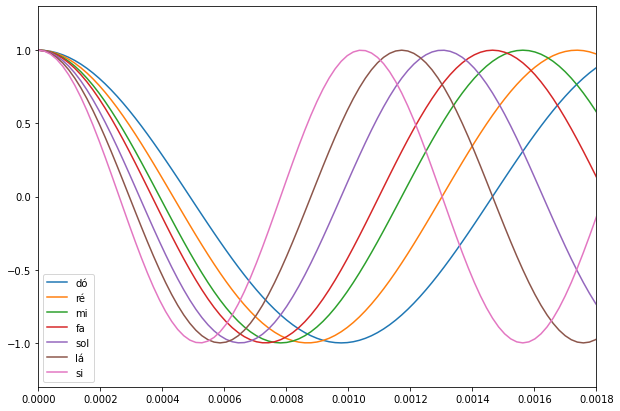

In [10]:
import numpy as np             
import matplotlib.pyplot as plt 
import scipy.io.wavfile as wv 
import os

# Parâmetros da onda:
tf = 1                         # Tempo de duração da nota
fc = 512                       # Frequência da nota Dó
intervals = [1, 9/8, 5/4, 4/3, 3/2, 5/3, 15/8]
fs = 100*fc                    # Frequencia de amostragem da nota. 
t =np.arange(0,tf+1/fs,1/fs)   # Vetor tempo. Para cada elemento do vetor t, haverá um elemento em y correspondente.
A = 1                          # Amplitude do sinal

for interval in intervals:
    y=A*np.cos(2*np.pi*interval*fc*t)       # Sinal senoidal
    plt.figure(1,figsize=[10,7])   # cria instância da figura para poder alterar seu tamanho
    plt.plot(t,y, label='Notas Musicais')  # Visualizar o sinal gerado  
    plt.axis([0,0.00180,-1.3,1.3])        # Zoom para melhor visualização
    plt.legend(['dó', 'ré', 'mi', 'fa', 'sol', 'lá', 'si'])

plt.show() 


# D01 Exercício 02

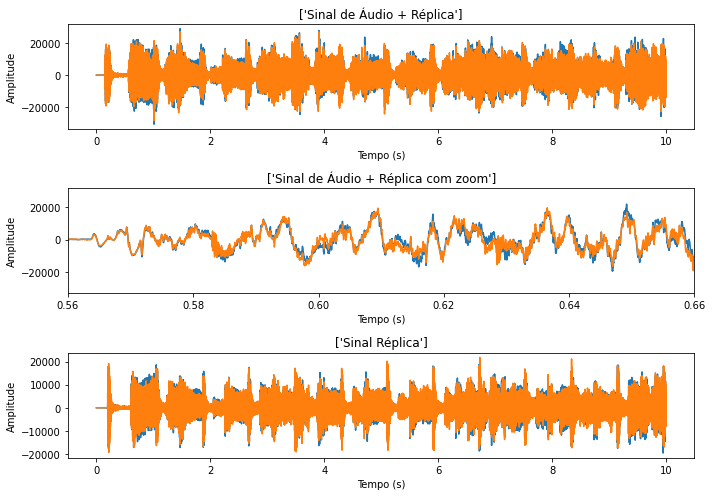

In [20]:
import numpy as np
import scipy.io.wavfile as wv 
import os
import matplotlib.pyplot as plt
import sounddevice as sd

soundFile = './sound_02.wav'
 # Especifica do local e nome do arquivo de áudio
dFa,vtSom = wv.read(soundFile)                     # Abre arquivo
tf = 10                                            # Tempo que deseja tocar o arquivo
amostrasTf = int(np.ceil(tf*dFa))                  # Número de amostras para o tempo especificado
vtSom = vtSom[0:amostrasTf,:]                      # Considera somente as amostras para o tempo especificado
dta = 1/dFa                                        # Tempo entre amostras
dTFinal = (len(vtSom)-1)*dta                       # Tempo da última amostra do sinal de áudio
vtTSom = np.arange(0,dTFinal+dta,dta)              # Eixo temporal do arquivo de áudio
plt.figure(1,[10,7])
# plt.plot(vtTSom,vtSom)                             # Plota gráfico do áudio
# plt.title(['Sinal de Áudio'])                      # Configura título do gráfico
# plt.ylabel('Amplitude')                            # Configura eixo X do gráfico
# plt.xlabel('Tempo (s)')                            # Configura eixo Y do gráfico


wv.write('./sem_eco.wav',dFa,vtSom)
#os.system('cvlc --play-and-exit ../MATERIAL/HD_02_PYTHON/sem_eco.wav') 

## Modifica o arquivo incluindo eco (uma réplica atrasada do sinal oirginal)
n = 2000                                           # Atraso da réplica do sinal                                                          
eco = np.zeros([len(vtSom),2])
end=len(vtSom)
eco[n:,:] = vtSom[0:end-n,:] 
vtSomEco = np.zeros([len(eco),2])
vtSomEco = eco
vtSomEco += vtSom
vtSomEco = vtSomEco.astype('int16')

wv.write('./com_eco.wav',dFa,vtSomEco.astype('int16'))
#os.system('cvlc --play-and-exit ../MATERIAL/HD_02_PYTHON/com_eco.wav') 


# sd.play(vtSom,dFa)                                  # Reproduz o audio original
# sd.wait()# Espera o fim da reprodução do audio para continuar a execução do código

plt.subplot(311)
plt.plot(vtTSom,vtSomEco)                          # Plota gráfico do áudio
plt.title(['Sinal de Áudio + Réplica'])            # Configura título do gráfico
plt.ylabel('Amplitude')                            # Configura eixo X do gráfico
plt.xlabel('Tempo (s)')    
plt.subplot(312)                                   # Segundo gráfico do subplot

plt.xlim([0.56,0.66])
plt.plot(vtTSom,vtSomEco)                          # Plota gráfico do áudio
plt.title(['Sinal de Áudio + Réplica com zoom'])            # Configura título do gráfico
plt.ylabel('Amplitude')                            # Configura eixo X do gráfico
plt.xlabel('Tempo (s)')    

# sd.play(vtSomEco,dFa)                               # Reproduz o audio com eco
# sd.wait()                                           # Espera o fim da reprodução do audio para continuar a execução do código

plt.subplot(3,1,3)                                 # Terceiro gráfico do subplot
plt.plot(vtTSom,vtSom-vtSomEco)                    # Plota gráfico do áudio
plt.title(['Sinal Réplica'])                       # Configura título do gráfico
plt.ylabel('Amplitude')                            # Configura eixo X do gráfico
plt.xlabel('Tempo (s)')                            # Configura eixo Y do gráfico

# sd.play(vtSom-vtSomEco,dFa)                         # Reproduz apenas o eco
# sd.wait()  

plt.tight_layout()
plt.show()